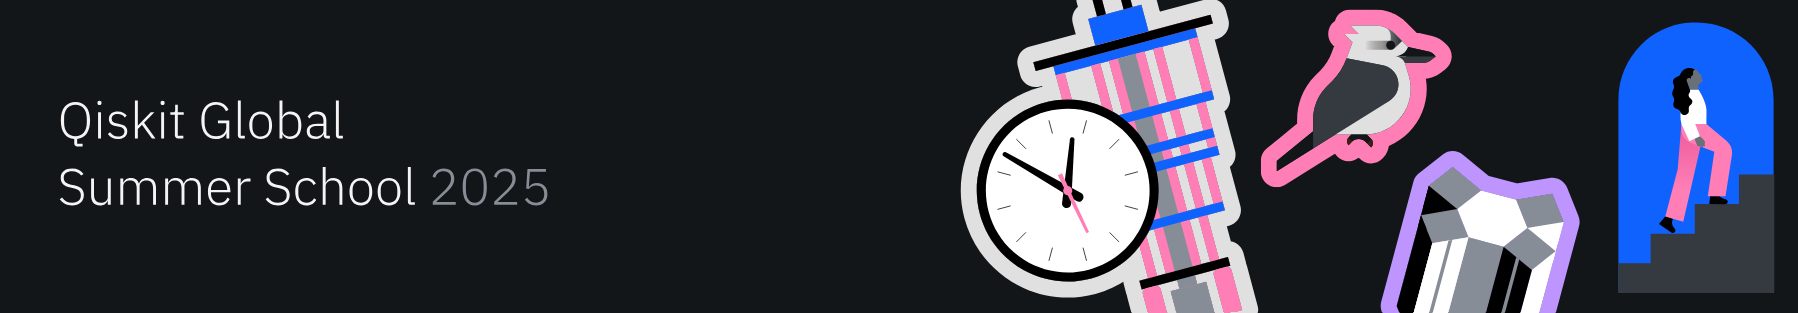

# Lab 0: Hello Quantum World!

# Table of Contents

* [Welcome to the Qiskit Global Summer School 2025!](#welcome)
    - [Lab 0 overview](#overview)
    - [Install Qiskit](#install)
    - [Troubleshooting](#troubleshooting)
    - [Setting API token](#setting-ibm-cloud)
    - [Imports](#imports)
    - [Sanity check](#sanity-check)
* [Generate a three-qubit GHZ state using Qiskit patterns](#ghz) 
    - [Step 1. Map](#map)
    - [Step 2. Optimize](#optimize)
    - [Step 3. Execute](#execute)
    - [Step 4. Post-process](#post-process)
* [Congratulations!](#congratulations)
    - [Bonus challenge: Run GHZ on hardware](#bonus)


# Welcome to the Qiskit Global Summer School 2025! <a id="welcome"></a>

We are thrilled to welcome you to another year of the Qiskit Global Summer School (QGSS). This two-week summer program combines theoretical lectures with hands-on exercises to expand the knowledge of quantum computing and quantum programming among the community of students, researchers, and professionals that use Qiskit in their everyday quantum journey. 

The hands-on component of this summer school consists of a series of Jupyter notebooks ("labs") designed to guide you through different topics of interest.

Each lab complements the corresponding theoretical lectures and includes helpful links to documentation, tutorials, and references to the lectures. Furthermore, you can also find many useful resources in [IBM Quantum Learning](https://quantum.cloud.ibm.com/learning).

## Lab 0 overview <a id="overview"></a>

The main goal of this introductory lab is to show you how to use the challenge notebooks, grade your solutions, and verify that your computer is correctly set up for executing the quantum codes that you will be asked to complete.

To complete the different labs of the QGSS, you need to know that every notebook will contain some predefined cells that you should not modify, and some challenge code blocks that you will need to fill with your own code. In particular, you will need to write the required code below each line that has the `### WRITE YOUR CODE BELOW HERE ###` comment. Make sure that every time you restart the kernel, you execute every cell in order, so that the challenge notebooks execute and are graded properly. This will guarantee that all the code is updated and everything runs smoothly. There may be a few exceptions, such as installation cells or cells where you save your account credentials. These will likely only need to be run once.

The content of this lab focuses on using Qiskit patterns to produce a GHZ state, emphasizing the importance of designing optimized quantum circuits. At the end is a bonus exercise where you can execute your code on a real quantum computer.

## Install Qiskit <a id="install"></a>
Quantum computers stand as a technology that promises to disrupt how some calculations are done - from breaking encryption with Shor's algorithm, to enabling faster searches with Grover's algorithm, to designing better batteries with quantum phase estimation. A first step is choosing a software tool for designing and executing such algorithms. In these challenges you will use Qiskit for the design and implementation of quantum circuits in simulators and real hardware. The following will help you install Qiskit v2.0.

First, check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version we will use:

In [1]:
from platform import python_version

print(python_version())

3.12.10


If that is not the case, you can upgrade it using your preferred tool. If you are unsure how to do it, some recommended options are:

- MacOS: [Homebrew](https://brew.sh/)
- Linux: `sudo apt-get update `

A detailed guide on how to upgrade Python depending on your OS is detailed here: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version)

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** You cannot run Lab 3 of the QGSS using Windows. Hence, if you are using Windows, we recommend you use [an online lab environment.](https://docs.quantum.ibm.com/guides/online-lab-environments) 


</div>

For more information take a look at the wiki: https://github.com/qiskit-community/qgss-2025/wiki/Jupyter-Notebook-Environment-(Local-and-Online)

Now let's install the grader that will install Qiskit 2.x and the necessary libraries we will need for the summer school.

In [2]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\padra\appdata\local\temp\pip-install-ba5a6cv6\qc-grader_88f39374a9c34aca8a14c0db6aa53c79
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1d7a6915623b0cfeac4c114391c279e9d98eb7f9
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\padra\AppData\Local\Temp\pip-install-ba5a6cv6\qc-grader_88f39374a9c34aca8a14c0db6aa53c79'

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\padra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.1
Grader version: 0.22.12


You should have Qiskit version `>=2.0.0` and Grader `>=0.22.9`. If you see a lower version, you need to restart your kernel and reinstall the grader.

## Troubleshooting <a id="troubleshooting"></a>

If the previous cell raised an error, you can opt to install Qiskit in a virtual environment (two suggested methods follow). If you have no errors, you can ignore this cell and proceed to the next one.

Here we propose two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

## Set up your IBM Cloud account <a id="setting-ibm-cloud"></a>

You must set up an IBM Cloud account in order to track progress with the grader, and to execute quantum circuits on real hardware.


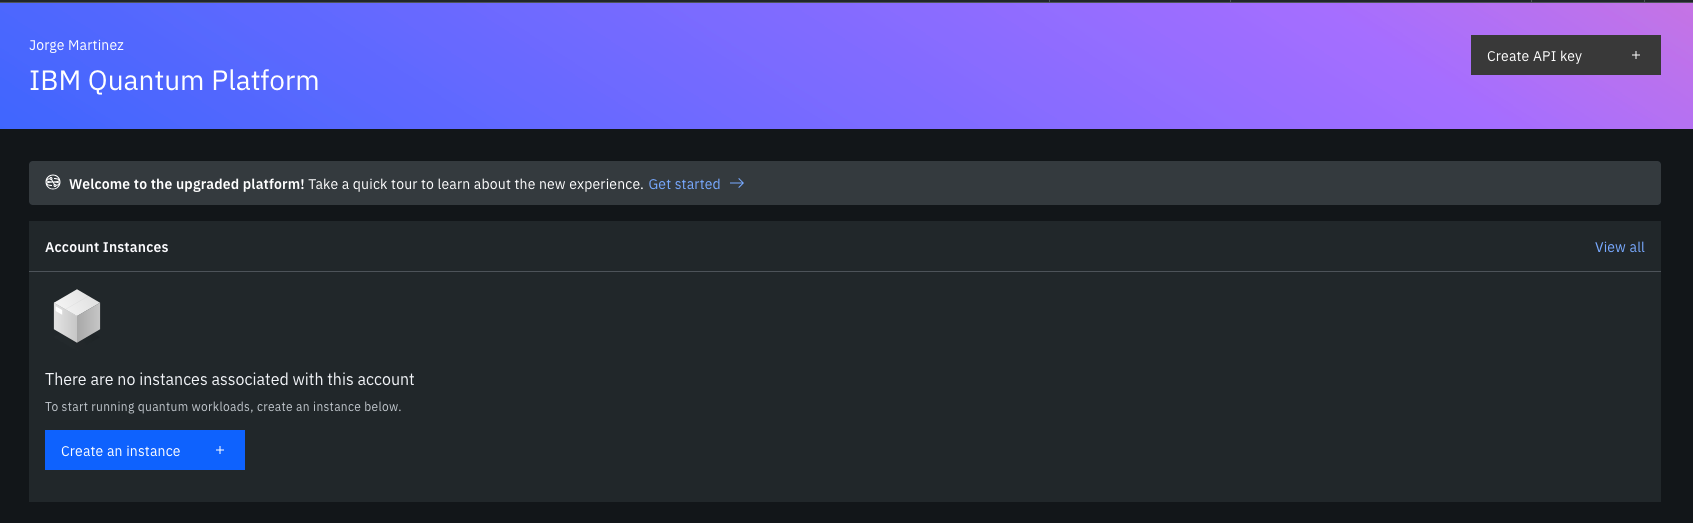




Set up your account as follows:

1. Go to the [upgraded IBM Quantum&reg; Platform](https://quantum.cloud.ibm.com/).
2. Go to the top right corner (as shown in the above picture), create your API token, and copy it to a secure location.
3. In the next cell, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the bottom left corner (as shown in the above picture) and **create your instance**. Make sure to choose the open plan.
5. After the instance is created, copy its associated CRN code. You may need to refresh to see the instance.
6. In the cell below, replace `deleteThisAndPasteYourCRNHere` with your CRN code.

See [this guide](https://quantum.cloud.ibm.com/docs/guides/cloud-setup) for more details on how to set up your IBM Cloud&reg; account.

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** Treat your API key as you would a secure password. See the [Cloud setup](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.
</div>

In [ ]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "redacted"
your_crn = "redacted"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="quantumly-confused",
    overwrite=True
)

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="redacted")
service.saved_accounts()

## Imports <a id="imports"></a>


In [7]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

## Sanity check <a id="sanity-check"></a>

Let's now create a very simple quantum circuit to check that everything is working as expected.

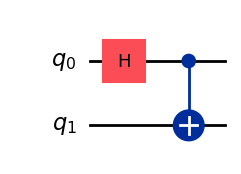

In [8]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

The output you see represents a quantum circuit that produces a Bell state:

$$|Bell\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

# Generate a three-qubit GHZ state using Qiskit patterns <a id="ghz"></a>

Now, we will follow this episode of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) to guide you through the process of generating a three-qubit GHZ state using [Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns). 

A Qiskit pattern is a general framework for breaking down domain-specific problems and contextualizing required capabilities in stages. This allows for the seamless composability of new capabilities developed by IBM Quantum researchers (and others) and enables a future in which quantum computing tasks are performed by powerful heterogenous (CPU/GPU/QPU) computing infrastructure. 

The four steps of a Qiskit pattern are as follows:

1. **Map** problem to quantum circuits and operators
2. **Optimize** for target hardware
3. **Execute** on target hardware
4. **Post-process** results


## Step 1. Map <a id="map"></a>

The Greenberger–Horne–Zeilinger (GHZ) state is the extension to three (or more) qubits to the maximally entangled state characteristic of the Bell state depicted above. That means that the GHZ state is:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}.
$$

One of the interesting features of the GHZ state is that there are different and equivalent ways to build it using a quantum circuit. In Exercise 1 you will do it in one of the most common ways.

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 1: Design a GHZ state</b> 

This is your first exercise of the Summer School! Exciting, huh?

In this exercise, you will design a GHZ state following the steps below:

1. Apply a Hadamard gate to qubit 0, putting it into a superposition. 
2. Apply a CNOT gate between qubits 0 and 1.
3. Apply a CNOT gate between qubits 1 and 2.

</div>

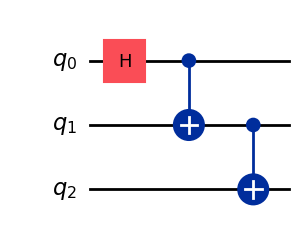

In [9]:
# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)
# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)
### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [9]:
# Submit your answer using following code
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 2. Optimize <a id="optimize"></a>

Well done designing the circuit!

In this case, the circuit is very shallow, and it is not possible to further simplify it or reduce the required number of gates that are needed to build the GHZ state. However, there are other scenarios in which optimizing the circuit is key.

There may be situations where you face restrictions in how your quantum circuit can be designed. For example, when running circuits on quantum hardware, you might find connectivity constraints between qubits. This means that some qubits may not be physically connected, so you will need to think of a smart way to implement gates that produce the desired quantum state. Luckily for us, this is where the Qiskit transpiler comes to the rescue! You can provide the desired circuit along with the device's constraints to the transpiler and it will handle the optimization for you.

Let us consider, for the GHZ state, a situation in which we are limited to interactions only between qubits 0 and 1 and qubits 0 and 2, but not between qubits 1 and 2. We can introduce these constraints to the transpiler using the `transpile` function.

<a id="Exercise_2"></a>
<div class="alert alert-block alert-success">
    
<b>Exercise 2: Transpile a GHZ state</b> 

In this second exercise you are asked to transpile the previous GHZ state with the mentioned connectivity constraints:

- Qubit 0 <---> Qubit 1
- Qubit 0 <---> Qubit 2
- ~~Qubit 1 <---> Qubit 2~~

</div>

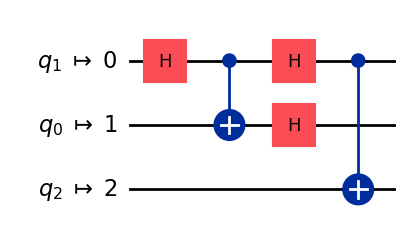

In [10]:
### WRITE YOUR CODE BELOW HERE ###
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0, 1], [0, 2]]
### YOUR CODE FINISHES HERE    ###

# Transpile the quantum circuit `qc` using the `transpile` function and the coupling map
from qiskit import transpile
qc_transpiled = transpile(qc, coupling_map=coupling_map, optimization_level=3)
### YOUR CODE FINISHES HERE    ###

qc_transpiled.draw("mpl")

In [11]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 3. Execute <a id="execute"></a>

The next step is exciting - we are going to run the quantum circuit using Qiskit Runtime! 

We will do that using the two [Qiskit primitives](https://quantum.cloud.ibm.com/docs/guides/primitives):
1. **Sampler** samples the output register from the execution of one or more quantum circuits. Its output is counts on per-shot measurements. 
2. **Estimator** computes the expectation value of one or more observables with respect to the states generated by the quantum circuit. Its output consist of the expectation values along with their standard errors.

First, we execute our circuit using the Sampler, then save the results as the variable `results_sampler`. 

In [11]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

Now, we run our circuit using the Estimator primitive, then save the results as the variable `results_estimator`.

In [12]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

Next is the final step of Qiskit patterns, where we will visualize our results.

## Step 4. Post-process <a id="post-process"></a>

Finally, the last step of Qiskit patterns is to post-process the information we have gathered from the execution of the quantum circuit.

First we visualize the results from the Sampler. We can visualize the counts with a histogram plot and quickly see how the two possible quantum states are measured with a probability of 50%.

  Outcomes : {'111': 523, '000': 501}


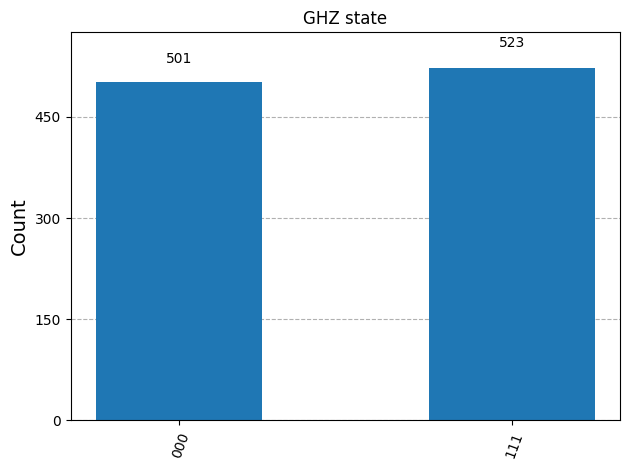

In [13]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Now we can visualize the results of the Estimator.

Expectation values: [('ZZZ', np.float64(0.0244140625)), ('ZZX', np.float64(0.02685546875)), ('ZII', np.float64(0.02294921875)), ('XXI', np.float64(-0.0087890625)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


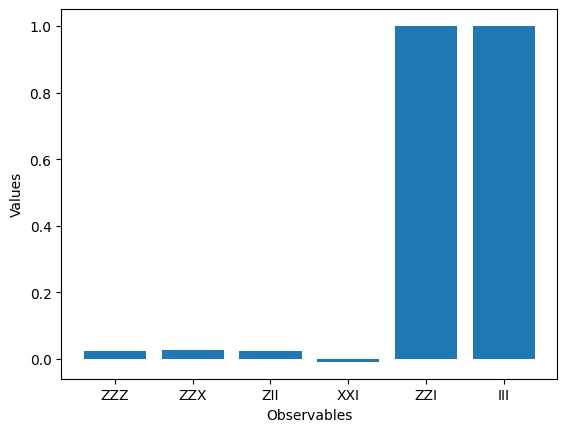

In [14]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

We see that the observables $ZZI$ and $III$ have an expectation value of 1, since $ZZI$ introduces two minus signs that cancel out, and $III$ acts as the identity, leaving the GHZ state unchanged. The rest of the observables have an expectation value of 0, since their $Z$ operators introduce an odd number of minus signs, or the $X$ operators flip a number of qubits that make the overlapping states orthogonal.

# Congratulations! <a id="congratulations"></a>

You have successfully completed Lab 0 and are now set to start the Quantum Global Summer School 2025!

In this lab you have successfully set up your machine to execute Qiskit v2.x, and saved your IBM Cloud token to track your progress during the Summer School and execute quantum circuits in real hardware. You have also learned about Qiskit patterns by implementing a specific example of the GHZ circuit and designing an optimized quantum circuit. Finally, you have executed a GHZ circuit on a quantum simulator, and observed how the measurements of the Sampler are in good agreement with the theoretical probabilities of measuring the states $|000\rangle$ and $|111\rangle$ with 50% probability.

You can check your progress witht he labs using the cell below:

In [16]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 516 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


As a bonus exercise, it would be interesting to perform the same experiment on real hardware to see how the noise affects the outcomes, then compare the results to show that we will not have a perfect agreement between the theoretical probabilities and the outcomes. 

Are you ready? Let's dig in!

## Bonus challenge: Run GHZ on hardware <a id="bonus"></a>

To execute a quantum circuit on a quantum computer using Qiskit, we first need to define the quantum backend. We could manually select a specific quantum computer we want to use out of the ones available from IBM Quantum. However, sometimes it is more convenient to select the machine that is least busy at the moment to ensure a fast execution. That's where the method `least_busy` is helpful.

In [15]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService(name="quantumly-confused")

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

We are using the ibm_torino quantum computer


The next call illustrates how easy it is to execute quantum circuits on hardware with `QiskitRuntimeService`. Once we have selected the backend in the cell above, we can simply copy and paste the same lines of code that we wrote for the Sampler simulator, including post-processing and visualization.

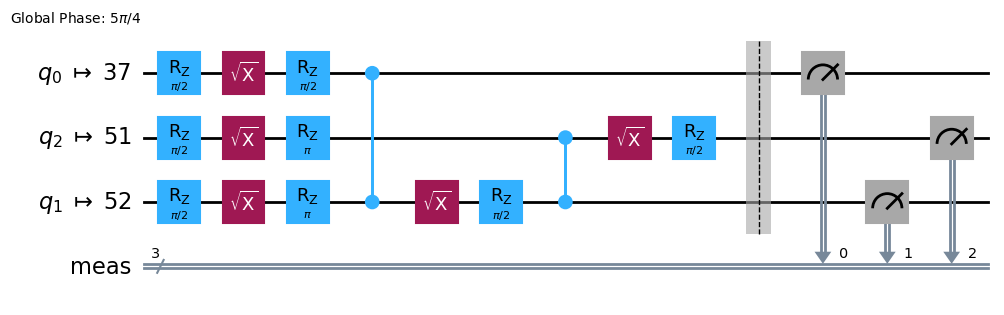

In [16]:
### WRITE YOUR CODE BELOW HERE ###
# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable `qc`

# Step 2. Optimize
pm = generate_preset_pass_manager(backend=backend, optimization_level=3) 
qc_transpiled = pm.run(qc)
qc_transpiled.draw(output="mpl", idle_wires=False, style="iqp")

<div class="alert alert-block alert-warning">
<b>Warning: Queue time and 10 minute limit</b>

This will roughly take 10s of calculation time on the real hardware, however, running this on the real hardware can lead to long queue times and will take a while, 
and will block the jupyter notebook in the meantime. 

Please note that the open plan only includes 10 minutes time on the real hardware, and since we will need these minutes in the later labs, please make sure to save most of your time for these labs. 

</div>

In [17]:
# Step 3. Execute
sampler = Sampler(mode=backend)
#sampler.options.default_shots = 1000
job = sampler.run([qc_transpiled])
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d2140uslir9s73aih38g


Outcomes : {'000': 2016, '111': 1865, '110': 47, '100': 24, '001': 26, '010': 42, '101': 28, '011': 48}


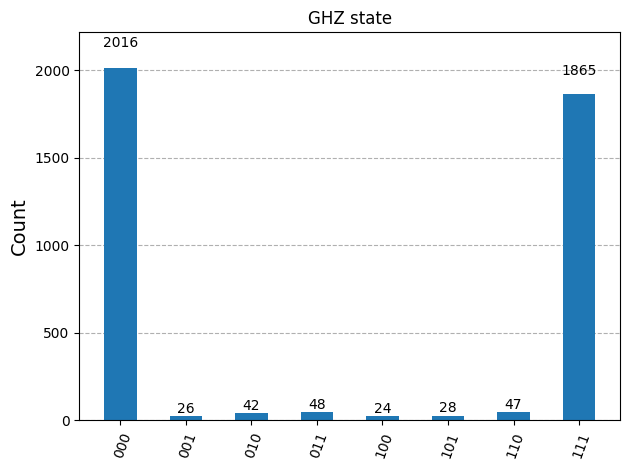

In [18]:
# Step 4. Post-process
results = job.result()
counts_list = results[0].data.meas.get_counts()
### YOUR CODE FINISHES HERE    ###

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')

Awesome! 

You have managed to run a circuit on a real quantum computer, and the results are very good! The most repeated states are $|000\rangle$ and $|111\rangle$, and they accumulate a probability just below 50%. However, in this case we observe that, due to noise from the quantum computer, some quantum states are measured, even if the theoretical probability of measuring is 0. This is indeed expected, and we will see in the next labs how we can try to correct or mitigate the errors that are introduced by the noisy nature of quantum computers.

# Additional information

**Created by:** Jorge Martínez de Lejarza

**Advised by:** Marcel Pfaffhauser, Junye Huang

**Version:** 1.0.0